In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio

%matplotlib inline

## Generating a Signal

First, let's generate a signal with frequencies 256 Hz and 554 Hz in equal parts.

## a) Look at the plot of the signal, and listen to it

(0, 0.1)

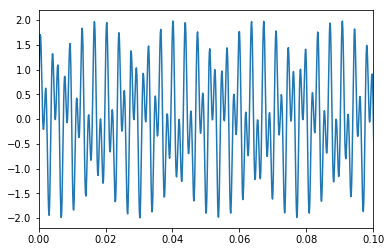

In [2]:
fs = 8000
t = np.arange(0, 5, step=1. / fs)
x = np.sin(2 * np.pi * 256 * t) + np.sin(2 * np.pi * 554 * t)

plt.plot(t, x)
plt.xlim(0, .1)

You can use the `Audio()` function inside `IPython.display` to listen to any signal. Don't forget to specify the sampling rate.

In [3]:
Audio(x, rate=fs)

## Frequency Analysis of the Signal

`np.fft.fft` is an implementation of the Fast Fourier Transform (FFT), which is an efficient algorithm that calculates the Discrete Fourier Transform (DFT).

Given a time-domain signal of length $N$, the first $\frac{N}{2}$ samples represent the values of the DFT at equally spaced frequencies in $[0, f_s / 2)$ and the last $\frac{N}{2}$ samples represent the values of the DFT at equally spaced frequencies in $[-f_s / 2, 0)$.

If the time-domain signal is real, then the DFT values at negative frequencies must be the complex conjugate of the DFT values at positive frequencies. So all of the information is in the first half of the DFT.

In [4]:
x_hat = np.fft.fft(x)
x_hat

array([ -4.63361574e-10 +0.00000000e+00j,
         8.06116749e-11 -9.66245309e-11j,
        -2.74830140e-10 -1.36945399e-10j, ...,
         9.35109601e-11 +1.20340438e-10j,
        -2.74790046e-10 +1.36945303e-10j,   8.06116749e-11 +9.66245309e-11j])

Since the values of the DFT are complex numbers, we often look at the magnitude or the power of these numbers.

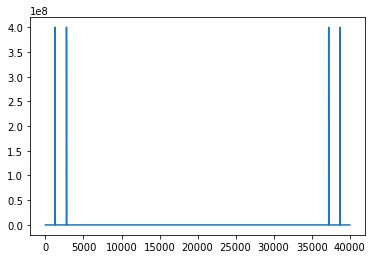

In [5]:
x_hat_pow = np.abs(x_hat) ** 2
plt.plot(x_hat_pow)

Let's plot this with a proper frequency axis.

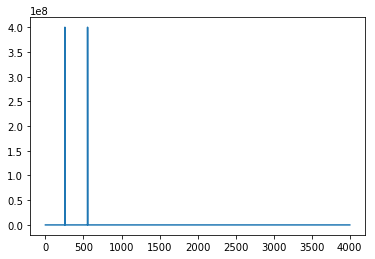

In [6]:
N = len(x)
f = np.arange(0, fs / 2, step=fs / N)
plt.plot(f, x_hat_pow[:(N // 2)])

Now let's add the negative frequencies as well.

## b) Look at the FT of the signal

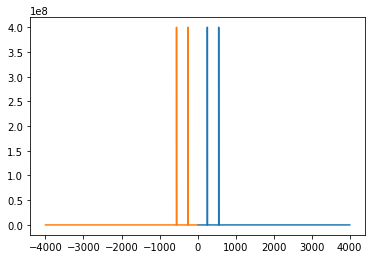

In [7]:
N = len(x)
f = np.arange(0, fs / 2, step=fs / N)
plt.plot(f, x_hat_pow[:(N // 2)])

f_neg = np.arange(-fs / 2, 0, step=fs / N)
plt.plot(f_neg, x_hat_pow[(N // 2):])

## GOAL: Let's design a filter that keeps the 256 Hz sinusoid, but removes the 554 Hz sinusoid.

We first design the filter that we want in the frequency domain. A lowpass filter with a cutoff frequency of 400 Hz should do the trick.

First, let's find the frequency response at positive frequencies.

(-0.1, 1.1)

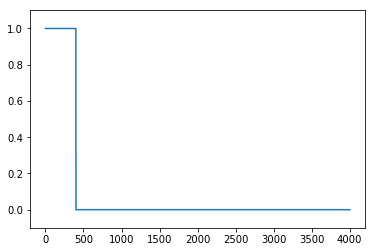

In [8]:
f_pos = np.arange(0, fs / 2, step=fs / N)
h_hat_pos = 1. * (f_pos <= 400)  # NOTE THE CUTOFF FREQUENCY HERE
plt.plot(f_pos, h_hat_pos)
plt.ylim(-.1, 1.1)

Now let's find the frequency response at negative frequencies.

(-0.1, 1.1)

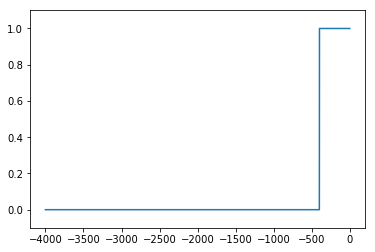

In [9]:
f_neg = np.arange(-fs / 2, 0, step=fs / N)
h_hat_neg = 1. * (f_neg >= -400)
plt.plot(f_neg, h_hat_neg)
plt.ylim(-.1, 1.1)

Finally, let's combine the frequency response at positive and negative frequencies. Remember that the negative frequencies go at the _end_ after the positive frequencies.

## c) Look at the transfer function (frequency response of the filter)

(-0.1, 1.1)

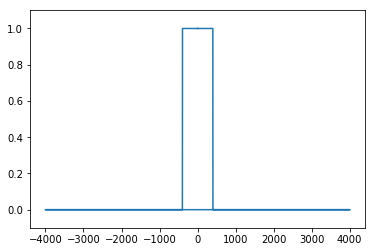

In [10]:
f = np.concatenate([f_pos, f_neg])
h_hat = np.concatenate([h_hat_pos, h_hat_neg])

plt.plot(f, h_hat)
plt.ylim(-0.1, 1.1)

Now let's take the _inverse_ DFT to find the impulse response of this filter.

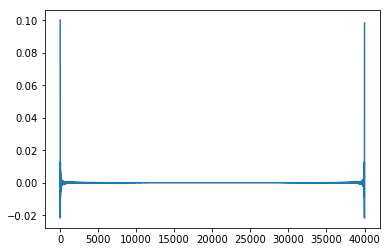

In [11]:
h = np.real(np.fft.ifft(h_hat))
plt.plot(h)

Let's truncate and put this impulse response in the right order.

## d) Look at the impulse response of the filter

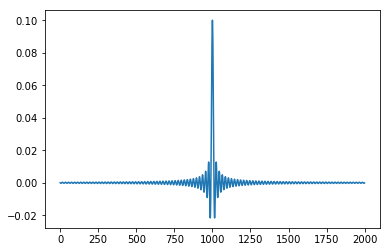

In [12]:
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

## Applying the Filter

Now we apply the filter by convolving the impulse response with the signal.

In [13]:
y = np.convolve(x, h_trunc)
y = y[1:] # remove the first sample (since there are an odd number of samples)

## e) Look at the output signal after the filter is applied to the input

(0.3, 0.4)

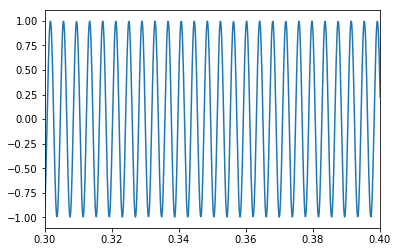

In [14]:
N = len(y)
t = np.arange(0, N / fs, step=1. / fs)
plt.plot(t, y)
plt.xlim(.3, .4)

Let's do a frequency analysis of this signal.

## f) Look at the FT of the output signal after filtering the input

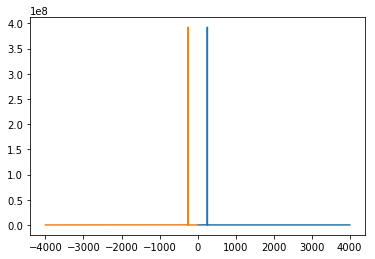

In [15]:
f_pos = np.arange(0, fs / 2, step=fs / N)
y_hat = np.fft.fft(y)
y_hat_pow = np.abs(y_hat) ** 2

plt.plot(f_pos, y_hat_pow[:(N // 2)])

f_neg = np.arange(-fs / 2, 0, step=fs / N)
plt.plot(f_neg, y_hat_pow[(N // 2):])

Finally, let's listen to the filtered signal.


## g) Listen to the output signal after filtering the input

In [16]:
Audio(y, rate=fs)